In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from config import weather_api_key
import requests

/Users/terencelin/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#Create set of random latittude and longitude combinations
latitude = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
longitude = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(latitude, longitude)
lat_lngs

In [3]:
#add the liatitudes and longitudes to a list
coordinates = list(lat_lngs)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
from citipy import citipy

In [5]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

616

In [ ]:
city_data = []
print("Data Retrieval    ")
print("------------------")

record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(len(city_data))

Data Retrieval    
------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | deputatskiy
Processing Record 4 of Set 1 | karakendzha
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | alotau
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | green river
Processing Record 12 of Set 1 | angoche
Processing Record 13 of Set 1 | bonoua
Processing Record 14 of Set 1 | arlit
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | menongue
Processing Record 17 of Set 1 | krasnoselkup
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | wattegam

Processing Record 33 of Set 4 | kahului
Processing Record 34 of Set 4 | namibe
Processing Record 35 of Set 4 | plettenberg bay
Processing Record 36 of Set 4 | barrow
Processing Record 37 of Set 4 | riverton
Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | santa lucia
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | general pico
Processing Record 43 of Set 4 | sabzevar
Processing Record 44 of Set 4 | kutum
Processing Record 45 of Set 4 | koumra
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | kurilsk
Processing Record 50 of Set 4 | vardo
Processing Record 1 of Set 5 | polson
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of Set 5 | dolores
Processing Record 5 of Set 5 | bambou

Processing Record 21 of Set 8 | gobabis
Processing Record 22 of Set 8 | morondava
Processing Record 23 of Set 8 | gornopravdinsk
Processing Record 24 of Set 8 | birnin kebbi
Processing Record 25 of Set 8 | general roca
Processing Record 26 of Set 8 | palmer
Processing Record 27 of Set 8 | santa maria
Processing Record 28 of Set 8 | ulaanbaatar
Processing Record 29 of Set 8 | alice springs
Processing Record 30 of Set 8 | kavaratti
Processing Record 31 of Set 8 | pimenteiras
Processing Record 32 of Set 8 | inhambane
Processing Record 33 of Set 8 | troitsko-pechorsk
Processing Record 34 of Set 8 | darhan
Processing Record 35 of Set 8 | morozovsk
Processing Record 36 of Set 8 | aberdeen
Processing Record 37 of Set 8 | simao
Processing Record 38 of Set 8 | manavalakurichi
Processing Record 39 of Set 8 | linxia
Processing Record 40 of Set 8 | mahebourg
Processing Record 41 of Set 8 | roma
Processing Record 42 of Set 8 | neepawa
Processing Record 43 of Set 8 | shahr-e babak
Processing Record 

In [ ]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(4)

In [ ]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df =city_data_df[new_column_order]
city_data_df.head(10)

In [ ]:
output_data_file = "weather_data/cit.csv"
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [ ]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
import time 
today = time.strftime("%x")
today

In [ ]:
plt.scatter(lats,
            max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
plt.title(f"City Latitude vs. Max Temperature" +time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

In [ ]:
plt.scatter(lats,humidity,edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")

plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

In [ ]:
plt.scatter(lats,cloudiness,edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label = "Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

In [ ]:
plt.scatter(lats,wind_speed,edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

In [ ]:
from scipy.stats import linregress

def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values, y_values)
    
    regress_values = x_values*slope+intercept
    
    line_eq = "y = " + str(round(slope,2))+"x+ " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq,text_coordinates,fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

In [ ]:
index13=city_data_df.loc[13]
index13

In [ ]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

In [ ]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature','Max Temp',(4,1) )


In [ ]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere \ for Maximum Temperature","Max Temp",(-50,90))

In [ ]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values,y_values,'Linearr Regression on the Northern Hemisphere \n for % Humidity','% Humidity',(40,10))

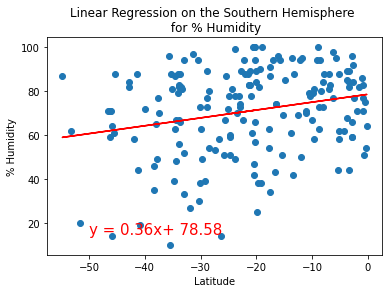

In [62]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity',
                      '% Humidity',(-50,15))

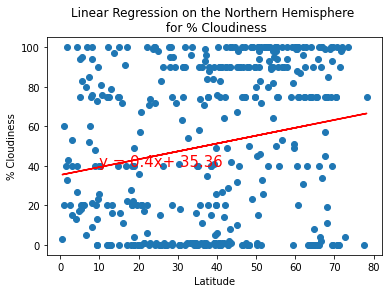

In [69]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness',"% Cloudiness",(10,40))

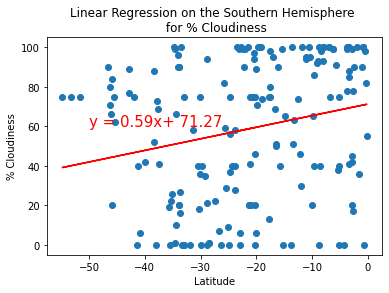

In [70]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                      '% Cloudiness',(-50,60))

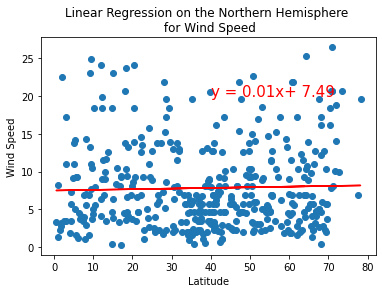

In [72]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed','Wind Speed',(40,20))

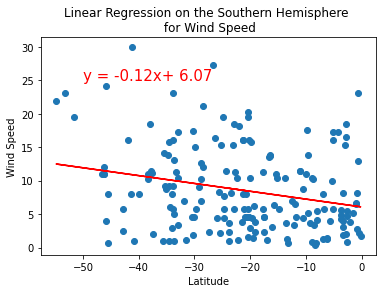

In [74]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed','Wind Speed',(-50,25))